## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )

earlystop_1 = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )

earlystop_2 = EarlyStopping(monitor="val_acc", 
                          patience=10, 
                          verbose=1
                          )

earlystop_3 = EarlyStopping(monitor="val_acc", 
                          patience=15, 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model1 = build_mlp(input_shape=x_train.shape[1:])
model2 = build_mlp(input_shape=x_train.shape[1:])
model3 = build_mlp(input_shape=x_train.shape[1:])
model4 = build_mlp(input_shape=x_train.shape[1:])

model1.summary()
model2.summary()
model3.summary()
model4.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)

model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model1.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop_1]
         )
model3.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop_2]
         )
model4.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop_3]
         )

# Collect results
train_loss1 = model1.history.history["loss"]
valid_loss1 = model1.history.history["val_loss"]
train_acc1 = model1.history.history["acc"]
valid_acc1 = model1.history.history["val_acc"]

exp_name_tag = "monitor=val_loss"
results[exp_name_tag] = {'train-loss': train_loss1,
                            'valid-loss': valid_loss1,
                            'train-acc': train_acc1,
                            'valid-acc': valid_acc1}

# Collect results
train_loss2 = model2.history.history["loss"]
valid_loss2 = model2.history.history["val_loss"]
train_acc2 = model2.history.history["acc"]
valid_acc2 = model2.history.history["val_acc"]

exp_name_tag = "monitor=val_acc"
results[exp_name_tag] = {'train-loss': train_loss2,
                            'valid-loss': valid_loss2,
                            'train-acc': train_acc2,
                            'valid-acc': valid_acc2}

# Collect results
train_loss3 = model3.history.history["loss"]
valid_loss3 = model3.history.history["val_loss"]
train_acc3 = model3.history.history["acc"]
valid_acc3 = model3.history.history["val_acc"]

exp_name_tag = "monitor=val_acc,patience=10"
results[exp_name_tag] = {'train-loss': train_loss3,
                            'valid-loss': valid_loss3,
                            'train-acc': train_acc3,
                            'valid-acc': valid_acc3}

# Collect results
train_loss4 = model4.history.history["loss"]
valid_loss4 = model4.history.history["val_loss"]
train_acc4 = model4.history.history["acc"]
valid_acc4 = model4.history.history["val_acc"]

exp_name_tag = "monitor=val_acc,patience=15"
results[exp_name_tag] = {'train-loss': train_loss4,
                            'valid-loss': valid_loss4,
                            'train-acc': train_acc4,
                            'valid-acc': valid_acc4}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 2s 36us/step - loss: 1.0836 - acc: 0.6270 - val_loss: 1.4664 - val_acc: 0.4908
Epoch 20/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.0630 - acc: 0.6347 - val_loss: 1.4550 - val_acc: 0.4931
Epoch 21/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.0424 - acc: 0.6418 - val_loss: 1.4703 - val_acc: 0.4937
Epoch 22/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.0218 - acc: 0.6509 - val_loss: 1.4664 - val_acc: 0.4968
Epoch 23/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9999 - acc: 0.6595 - val_loss: 1.4801 - val_acc: 0.4909
Epoch 24/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9783 - acc: 0.6697 - val_loss: 1.4687 - val_acc: 0.4916
Epoch 25/50
50000/50000 [==============================] - 2s 36us/step - loss: 0.9582 - acc: 0.6756 - val_loss: 1.4826 - val_acc: 0.4897
Epoch 00025: early stopping
Train on 50000 sam

50000/50000 [==============================] - 2s 37us/step - loss: 1.1839 - acc: 0.5911 - val_loss: 1.4886 - val_acc: 0.4810
Epoch 16/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.1625 - acc: 0.5988 - val_loss: 1.4705 - val_acc: 0.4863
Epoch 17/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1378 - acc: 0.6103 - val_loss: 1.4591 - val_acc: 0.4860
Epoch 18/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.1141 - acc: 0.6174 - val_loss: 1.4573 - val_acc: 0.4884
Epoch 19/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.0947 - acc: 0.6270 - val_loss: 1.4602 - val_acc: 0.4923
Epoch 20/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.0731 - acc: 0.6333 - val_loss: 1.4540 - val_acc: 0.4957
Epoch 21/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.0514 - acc: 0.6407 - val_loss: 1.4674 - val_acc: 0.4929
Epoch 22/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 36us/step - loss: 0.7407 - acc: 0.7624 - val_loss: 1.5386 - val_acc: 0.4890
Epoch 37/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.7182 - acc: 0.7714 - val_loss: 1.5469 - val_acc: 0.4909
Epoch 38/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.7009 - acc: 0.7778 - val_loss: 1.5411 - val_acc: 0.4930
Epoch 00038: early stopping


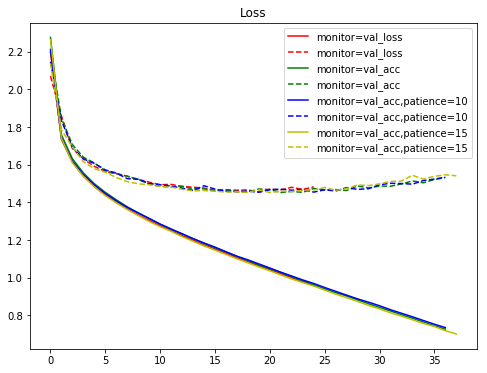

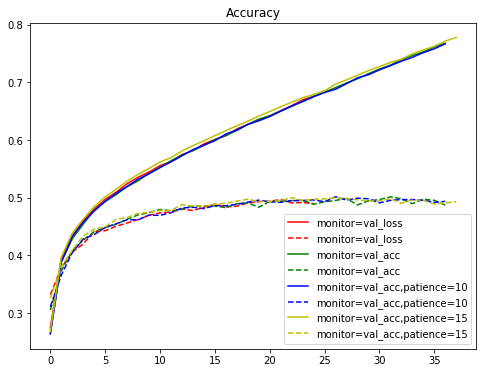

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()